$Z-Score \ Method $ (For Normally Distributed Data)

In [ ]:
# Z score Method to detect Outlier 
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

In [31]:
df= pd.read_csv("placement.csv")

In [32]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [33]:
df.shape

(1000, 3)

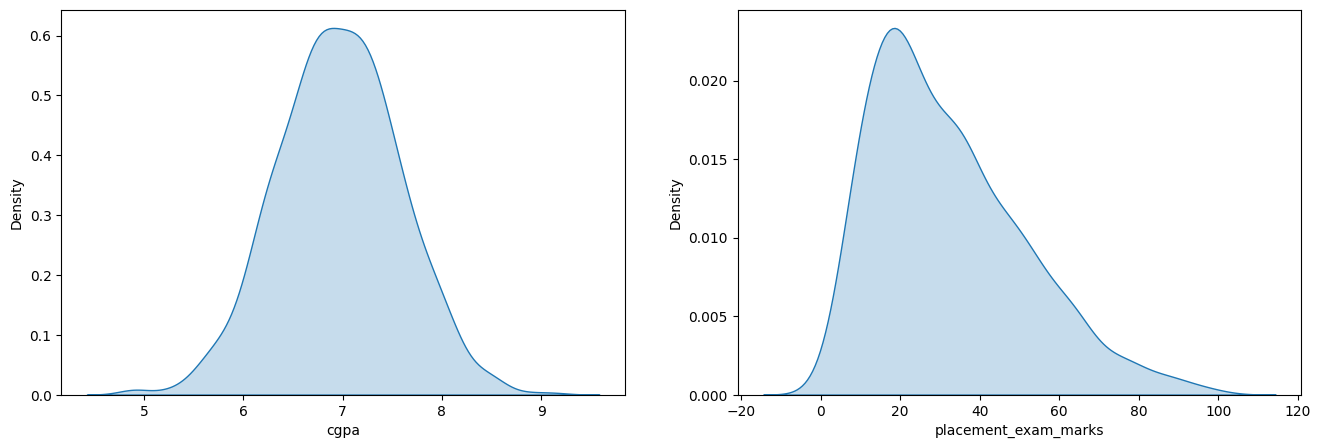

In [34]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['cgpa'] , fill= True)

plt.subplot(1,2,2)
sns.kdeplot(df['placement_exam_marks'] , fill = True)

plt.show()


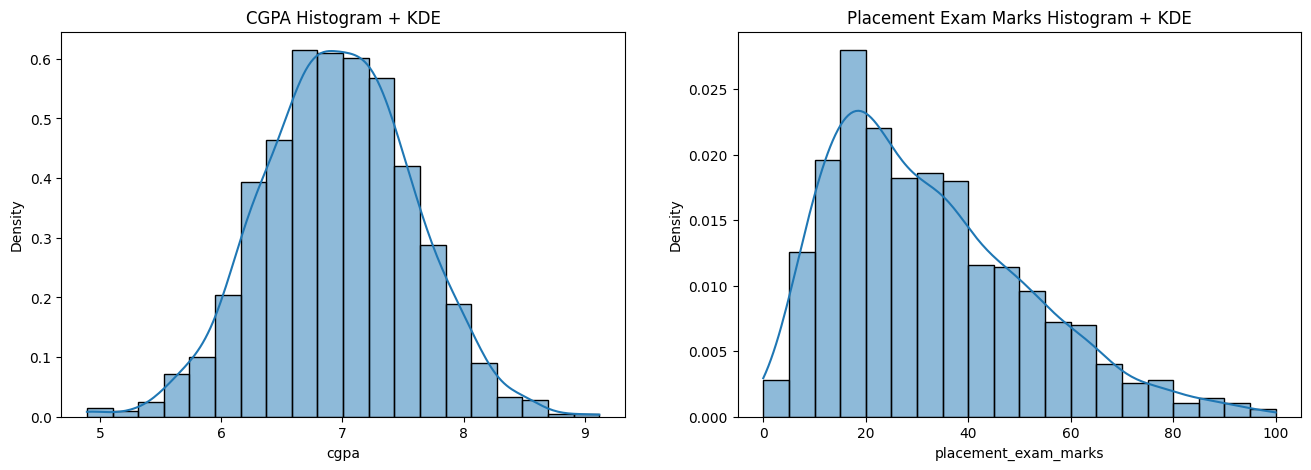

In [35]:
plt.figure(figsize=(16,5))

# First subplot
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True, stat="density", bins=20)
plt.title("CGPA Histogram + KDE")

# Second subplot
plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True, stat="density", bins=20)
plt.title("Placement Exam Marks Histogram + KDE")

plt.show()



In [36]:
print("For CGPA")   # AS CGPA only Following Normal Ditsribution
print("mean :" , df['cgpa'].mean())
print("Std deviation:" ,df['cgpa'].std())
print("Max:" , df['cgpa'].max())
print("Min:" ,df['cgpa'].min())

For CGPA
mean : 6.96124
Std deviation: 0.6158978751323896
Max: 9.12
Min: 4.89


In [37]:
max = df['cgpa'].mean()+3*df['cgpa'].std()
min = df['cgpa'].mean()-3*df['cgpa'].std()
max , min

(np.float64(8.808933625397168), np.float64(5.113546374602832))

$Triming$ \(Removing the outlier)

In [38]:
outlier = df[(df['cgpa']>max) | (df['cgpa']<min )]
outlier

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [39]:
df.shape

(1000, 3)

In [40]:
df_without_outlier = df[(df['cgpa']<max) & (df['cgpa']>min )]
df_without_outlier.shape

(995, 3)

$Caping$  \(caping the value of outlier)

In [41]:
new_df = df.copy()
new_df['cgpa'] = np.where(
    df['cgpa']>max,
    max,
    np.where(df['cgpa']<min,
    min,
    df['cgpa']
    )
    
)

In [45]:
new_df.shape

(1000, 3)

In [46]:
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [47]:
print("For CGPA")   # After clipping the value 
print("mean :" , new_df['cgpa'].mean())
print("Std deviation:" ,new_df['cgpa'].std())
print("Max:" , new_df['cgpa'].max())
print("Min:" ,new_df['cgpa'].min())

For CGPA
mean : 6.961498506374602
Std deviation: 0.6126883592648873
Max: 8.808933625397168
Min: 5.113546374602832


$IQR \ Method $ \(For skew data)

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

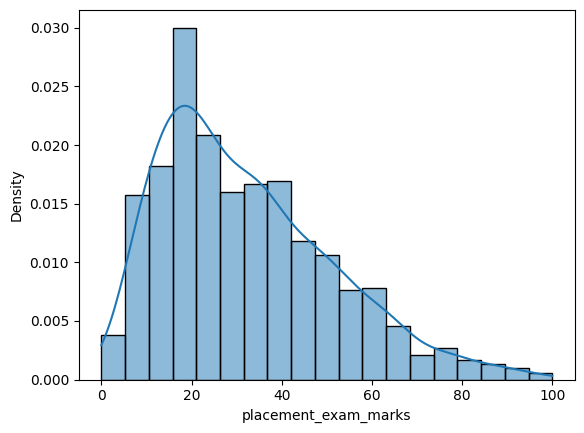

In [48]:
sns.histplot(df['placement_exam_marks'] , kde= True  , stat='density')

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

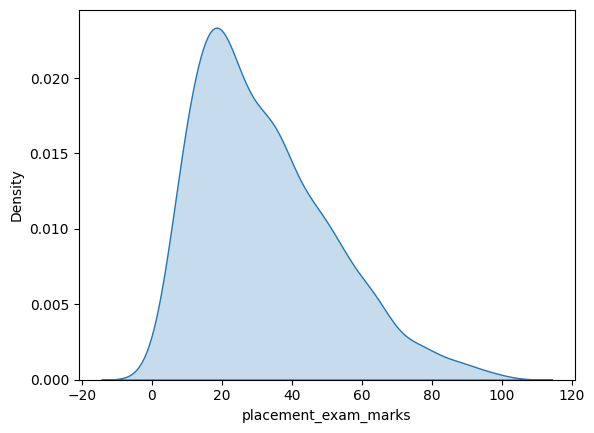

In [50]:
sns.kdeplot(df['placement_exam_marks'] , fill = True)

In [51]:
df['placement_exam_marks'].skew()  # close to 0 means  no skew , -ve means left skew , +ve means right skew

np.float64(0.8356419499466834)

In [52]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

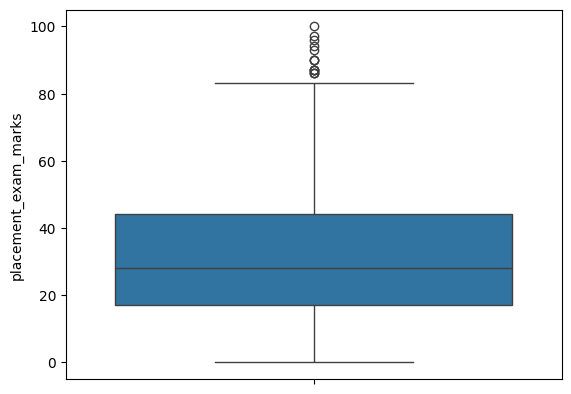

In [56]:
sns.boxplot(df['placement_exam_marks'])

In [58]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)
percentile25 , percentile75

(np.float64(17.0), np.float64(44.0))

In [59]:
IQR = percentile75-percentile25
Upper_limit = percentile75+1.5*IQR
Lower_limit = percentile25-1.5*IQR
Upper_limit , Lower_limit

(np.float64(84.5), np.float64(-23.5))

In [60]:
df[df['placement_exam_marks']>Upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [61]:
df[df['placement_exam_marks']<Lower_limit]

,cgpa,placement_exam_marks,placed


Triming 

In [62]:
new_df_without_outlier = df[(df['placement_exam_marks']<Upper_limit) & (df['placement_exam_marks']>Lower_limit)]

In [63]:
new_df_without_outlier.shape

(985, 3)

In [64]:
new_df_without_outlier.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


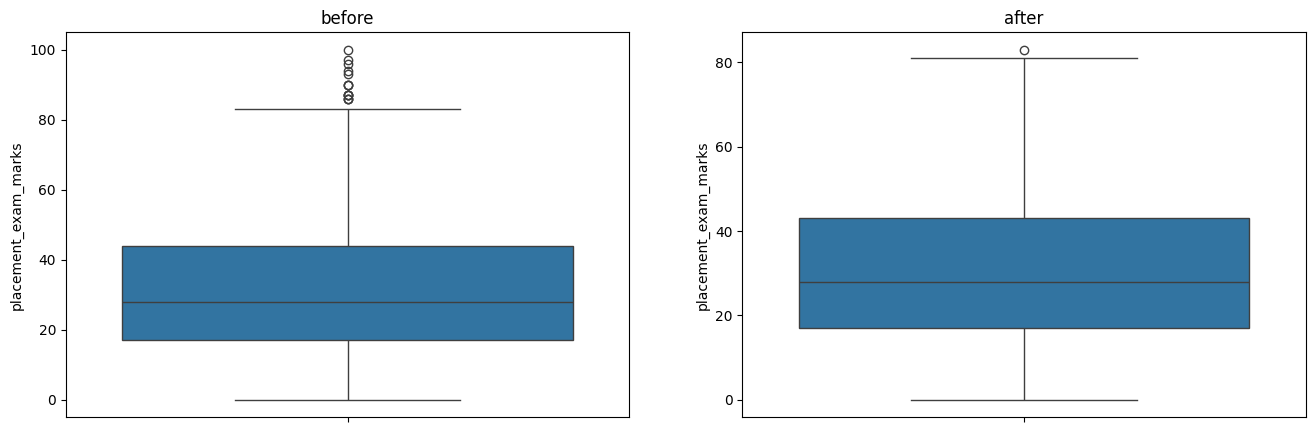

In [69]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['placement_exam_marks'])
plt.title("before")

plt.subplot(1,2,2)
sns.boxplot(new_df_without_outlier['placement_exam_marks'])
plt.title('after')

plt.show()

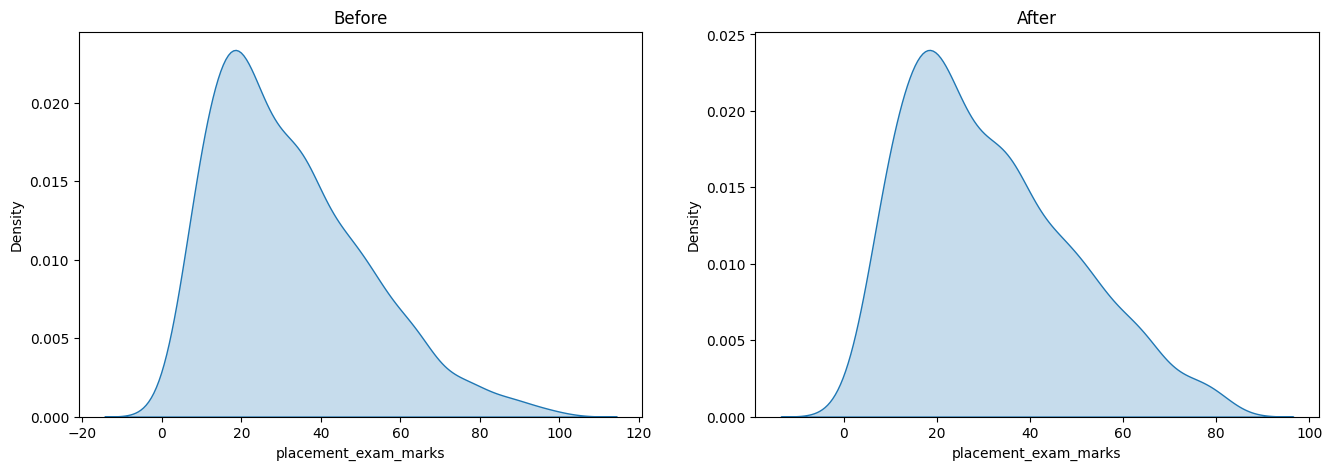

In [70]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['placement_exam_marks'] , fill = True)
plt.title('Before')

plt.subplot(1,2,2)
sns.kdeplot(new_df_without_outlier['placement_exam_marks'] , fill=True)
plt.title('After')

plt.show()

Capping The Outlier

In [71]:
new_df_with_replaced_outlier = df.copy()
new_df_with_replaced_outlier['placement_exam_marks'] = np.where(
    new_df_with_replaced_outlier['placement_exam_marks']>Upper_limit,
    Upper_limit,
    np.where(new_df_with_replaced_outlier['placement_exam_marks']<Lower_limit , Lower_limit , 
             new_df_with_replaced_outlier['placement_exam_marks'])
)

In [72]:
new_df_with_replaced_outlier.shape

(1000, 3)

In [74]:
new_df_with_replaced_outlier.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


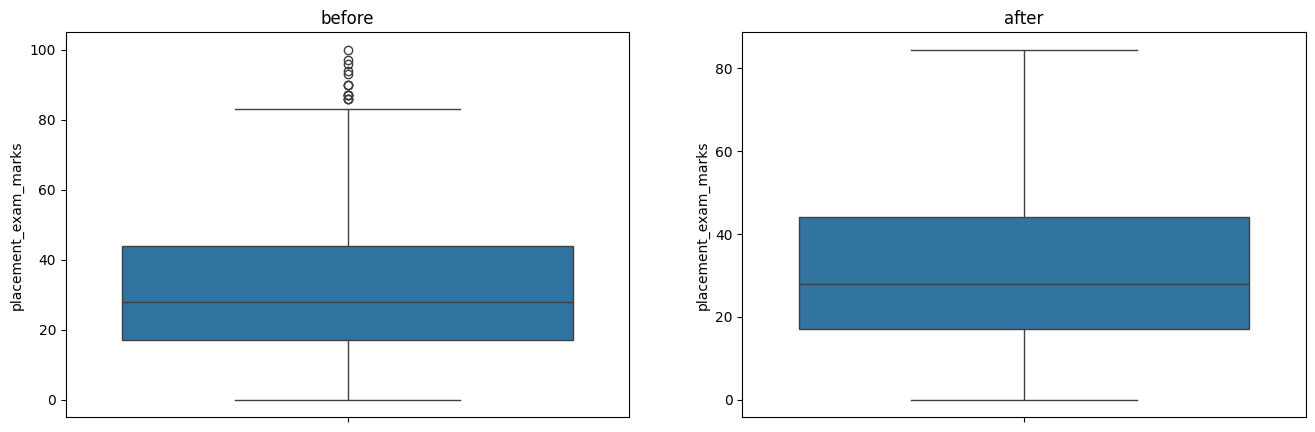

In [75]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['placement_exam_marks'])
plt.title("before")

plt.subplot(1,2,2)
sns.boxplot(new_df_with_replaced_outlier['placement_exam_marks'])
plt.title('after')

plt.show()

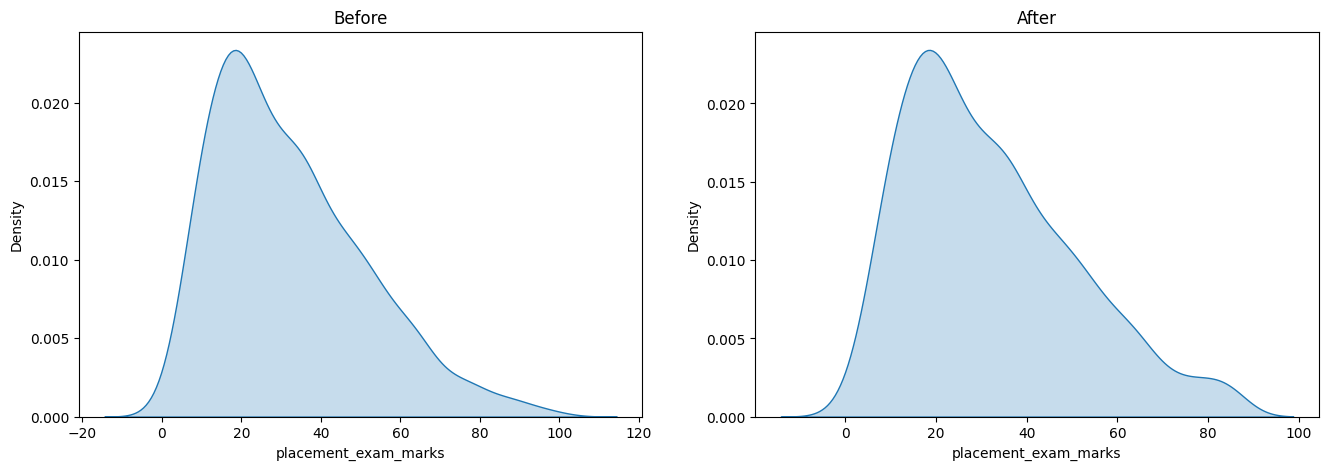

In [76]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.kdeplot(df['placement_exam_marks'] , fill = True)
plt.title('Before')

plt.subplot(1,2,2)
sns.kdeplot(new_df_with_replaced_outlier['placement_exam_marks'] , fill=True)
plt.title('After')

plt.show()